<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Number-of-Goals:-Women's-vs-Men's-Football" data-toc-modified-id="Number-of-Goals:-Women's-vs-Men's-Football-1">Number of Goals: Women's vs Men's Football</a></span></li><li><span><a href="#Project-Description" data-toc-modified-id="Project-Description-2">Project Description</a></span></li><li><span><a href="#1.-EDA" data-toc-modified-id="1.-EDA-3">1. EDA</a></span><ul class="toc-item"><li><span><a href="#Filtering-the-Data" data-toc-modified-id="Filtering-the-Data-3.1">Filtering the Data</a></span></li><li><span><a href="#Some-Exploration" data-toc-modified-id="Some-Exploration-3.2">Some Exploration</a></span></li></ul></li><li><span><a href="#2.-Choosing-the-Correct-Hypothesis-Test" data-toc-modified-id="2.-Choosing-the-Correct-Hypothesis-Test-4">2. Choosing the Correct Hypothesis Test</a></span><ul class="toc-item"><li><span><a href="#Check-for-Normality" data-toc-modified-id="Check-for-Normality-4.1">Check for Normality</a></span></li><li><span><a href="#Check-for-Homogenity-of-Variances" data-toc-modified-id="Check-for-Homogenity-of-Variances-4.2">Check for Homogenity of Variances</a></span></li></ul></li><li><span><a href="#3.-Performing-the-Hypothesis-Test" data-toc-modified-id="3.-Performing-the-Hypothesis-Test-5">3. Performing the Hypothesis Test</a></span></li><li><span><a href="#4.-Conclusions" data-toc-modified-id="4.-Conclusions-6">4. Conclusions</a></span></li></ul></div>

# Number of Goals: Women's vs Men's Football

# Project Description

The object of this research is the amount of goals scored in women's vs. men's football. I have a gut instinct that more goals are scored in women's international football matches than men's. To be sure, I need to perform a valid statistical hypothesis test.

We have two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: *women_results.csv* and *men_results.csv*.

Since the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, we'll limit the data used in the analysis to only Official FIFA World Cup matches (not including qualifiers) since 2002-01-01.

So, the question we are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

We assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [25]:
# importing libraries
import pandas as pd

from scipy.stats import shapiro
from scipy.stats import kstest, norm
from scipy.stats import levene
import statsmodels.api as sm
from scipy.stats import mannwhitneyu

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set the global figure size
plt.rcParams['figure.figsize'] = [10, 6]

In [2]:
# importing datasets
men = pd.read_csv(r"C:\Users\eadub\STUDY\Statistics\A-B-tests\Datasets\men_results.csv", index_col=0)
women = pd.read_csv(r"C:\Users\eadub\STUDY\Statistics\A-B-tests\Datasets\women_results.csv", index_col=0)

In [3]:
men.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly


In [4]:
women.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1969-11-01,Italy,France,1,0,Euro
1,1969-11-01,Denmark,England,4,3,Euro
2,1969-11-02,England,France,2,0,Euro
3,1969-11-02,Italy,Denmark,3,1,Euro
4,1975-08-25,Thailand,Australia,3,2,AFC Championship


# 1. EDA

## Filtering the Data

In [5]:
# Filtering the men's df 
men = men[(men['date']>='2002-01-01') & (men['tournament']=='FIFA World Cup')].reset_index(drop=True)
men.head()

,date,home_team,away_team,home_score,away_score,tournament
0,2002-05-31,France,Senegal,0,1,FIFA World Cup
1,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
2,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
3,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
4,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup


In [6]:
# Filtering the women's df 
women = women[(women['date']>='2002-01-01') & (women['tournament']=='FIFA World Cup')].reset_index(drop=True)
women.tail()

,date,home_team,away_team,home_score,away_score,tournament
195,2019-06-29,Germany,Sweden,1,2,FIFA World Cup
196,2019-07-02,England,United States,1,2,FIFA World Cup
197,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup
198,2019-07-06,England,Sweden,1,2,FIFA World Cup
199,2019-07-07,United States,Netherlands,2,0,FIFA World Cup


## Some Exploration

In [7]:
# Column names
men.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament'],
      dtype='object')

In [8]:
# Column names
women.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament'],
      dtype='object')

In [9]:
# Duplicates - men?
men.duplicated().any().sum()

0

In [10]:
# Duplicates - women?
women.duplicated().any().sum()

0

In [11]:
# Data types
men.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
dtype: object

In [12]:
# Data types
women.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
dtype: object

In [13]:
# Converting 'date' to datetime format
men['date'] = pd.to_datetime(men['date'])
women['date'] = pd.to_datetime(women['date'])

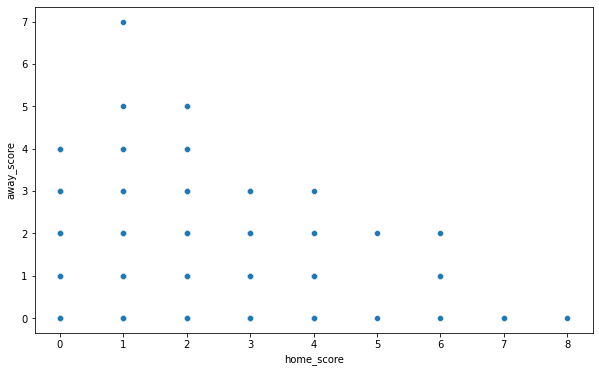

In [14]:
# Check the df for outliers in goals - men
sns.scatterplot(data=men, x='home_score', y='away_score')
plt.show()

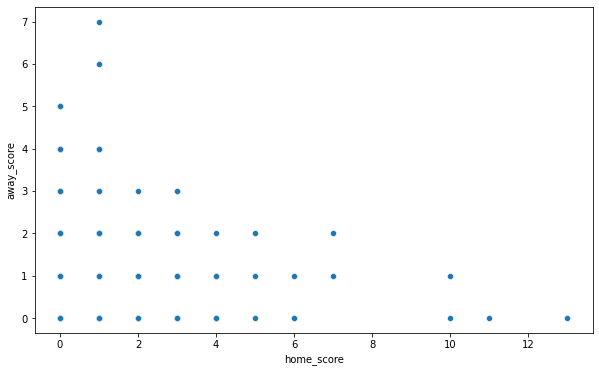

In [15]:
# Check the df for outliers in goals - women
sns.scatterplot(data=women, x='home_score', y='away_score')
plt.show()

In [16]:
# Time outliers - men?
men['date'].describe(datetime_is_numeric=True)

count                    384
mean     2012-07-16 16:52:30
min      2002-05-31 00:00:00
25%      2006-06-19 18:00:00
50%      2012-06-26 00:00:00
75%      2018-06-24 06:00:00
max      2022-12-18 00:00:00
Name: date, dtype: object

In [17]:
# Time outliers - women?
women['date'].describe(datetime_is_numeric=True)

count                    200
mean     2012-10-01 04:04:48
min      2003-09-20 00:00:00
25%      2007-09-17 18:00:00
50%      2015-06-07 12:00:00
75%      2019-06-08 00:00:00
max      2019-07-07 00:00:00
Name: date, dtype: object

There are no duplicates, outliers or other mistakes in the given data. 

But the amount of observations in the men's dataset is more than in women's: 384 vs 200. We'll take that on notice.

# 2. Choosing the Correct Hypothesis Test

Since our hypotheses are:
* $H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's and 
* $H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's, 

and our samples are *independent* and the *sample sizes are large* enough, I'll most likely use the independent samples t-test (also known as Welch's t-test), considering the different sample sizes (384 vs 200).

But first, we need to check some specific conditions:
1. Approximately Normal Distribution.
2. Homogenity of Variances.

In [18]:
# Calulating total goals
men['total_goals'] = men['home_score'] + men['away_score']
women['total_goals'] = women['home_score'] + women['away_score']

# Calculate the mean total goals for men and women
mean_goals_men = men['total_goals'].mean()
mean_goals_women = women['total_goals'].mean()

## Check for Normality

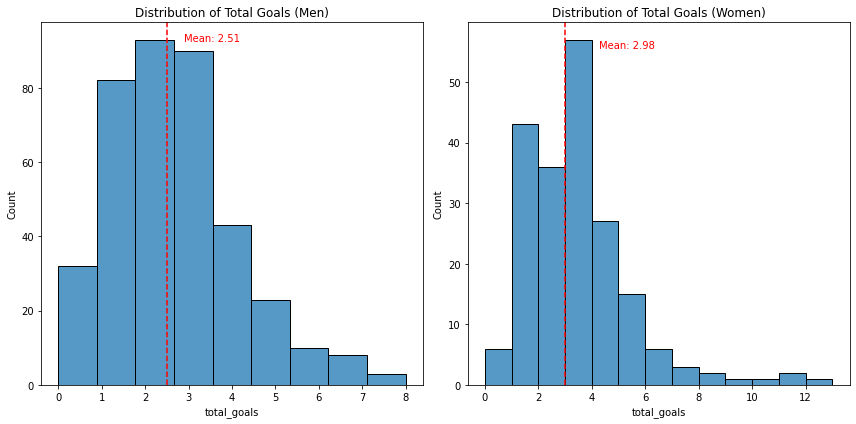

In [19]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the distribution of total goals for men
sns.histplot(data=men, x='total_goals', ax=ax1, bins=9)

ax1.axvline(mean_goals_men, color='red', linestyle='--', label=f'Mean: {mean_goals_men:.2f}')
ax1.annotate(f'Mean: {mean_goals_men:.2f}', xy=(0.52, 0.97), xycoords='axes fraction', ha='right', va='top', color='red')
ax1.set_title('Distribution of Total Goals (Men)')

# Plot the distribution of total goals for women
sns.histplot(data=women, x='total_goals', ax=ax2, bins=13)

ax2.axvline(mean_goals_women, color='red', linestyle='--', label=f'Mean: {mean_goals_women:.2f}')
ax2.annotate(f'Mean: {mean_goals_women:.2f}', xy=(0.49, 0.95), xycoords='axes fraction', ha='right', va='top', color='red')
ax2.set_title('Distribution of Total Goals (Women)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

The distribution of total goals doesn't seem normal for both men's and women's data - it's more right-skewed, which makes sense, since huge scores occur less frequently. Therefore, we can't use the t-test, and my choice of a statistical test is the **Mann-Whitney U test**.

However, I will check the data for normality with the Kolmogorov-Smirnov and the Shapiro-Wilk tests.

In [20]:
# Level of significance
alpha = 0.05

# Shapiro-Wilk test for men
statistic, p_value = shapiro(men['total_goals'])

if p_value < alpha:
    print("Reject the null hypothesis. The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis. The data is normally distributed.")

# Shapiro-Wilk test for women
statistic, p_value = shapiro(women['total_goals'])

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis. The data is normally distributed.")

Reject the null hypothesis. The data is not normally distributed.
Reject the null hypothesis. The data is not normally distributed.


In [21]:
# Kolmogorov-Smirnov test for men
statistic, p_value = kstest(men['total_goals'], norm.cdf)

if p_value < alpha:
    print("Reject the null hypothesis. The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis. The data is normally distributed.")

# Kolmogorov-Smirnov test for women
statistic, p_value = kstest(women['total_goals'], norm.cdf)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis. The data is normally distributed.")

Reject the null hypothesis. The data is not normally distributed.
Reject the null hypothesis. The data is not normally distributed.


Let's do one more check for normality of our data - the Q-Q plot.

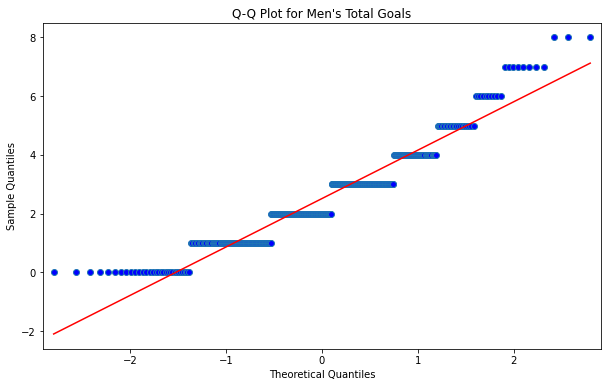

In [22]:
# Q-Q plot for men's total goals
sm.qqplot(men['total_goals'], line='s', marker='o', markerfacecolor='b')
plt.title("Q-Q Plot for Men's Total Goals")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

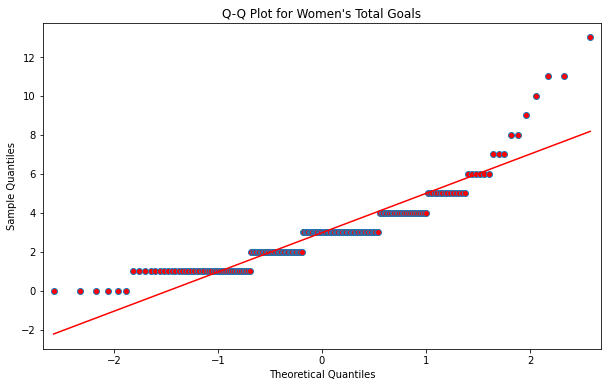

In [23]:
# Q-Q plot for women's total goals
sm.qqplot(women['total_goals'], line='s', marker='o', markerfacecolor='r')
plt.title("Q-Q Plot for Women's Total Goals")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

## Check for Homogenity of Variances

Also, i would like to check the homogenity of variances of my data. I will use Levene's test.

In [57]:
# Perform Levene's test
statistic, p_value = levene(men['total_goals'], women['total_goals'])

# Check the p-value to determine if variances are significantly different
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The variances are significantly different.")
else:
    print("Fail to reject the null hypothesis. The variances are not significantly different.")

Fail to reject the null hypothesis. The variances are not significantly different.


Though the variances in our samples are not significantly different, the distribution of total goals in both datasets is far away from normality. 

That is, we should use the non-parametric **Mann-Whitney U test**. This test does not assume a specific distribution for the data, making it robust to violations of normality.

# 3. Performing the Hypothesis Test

In [58]:
# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(women['total_goals'], men['total_goals'], alternative='greater')

# Setting alpha in accordance with the predefined condition
alpha = 0.10

# Check the p-value to determine if there is a significant difference between the groups
print("p_value:", p_value)
print()
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")

p_value: 0.005106609825443641

Reject the null hypothesis. There is a significant difference between the groups.


# 4. Conclusions

The test result shows that there is a **significant difference** between total goals in women's and men's soccer.

Therefore, we can conclude that more goals scored in women's international soccer matches than men's on FIFA World Cup matches in the 21st century.